# Import Data


In [47]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore

%matplotlib inline


In [93]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset/')
# Find all CSV and XLS files in the directory and its subdirectories
csv = list(directory.rglob('*.csv'))
xls = list(directory.rglob('*.xls'))

files = csv + xls


In [175]:
# import urllib.parse
# dataset_repo = "https://github.com/kittizz/water_quality_data_collection/raw/main/"
csv_files = list()
xls_files = list()
for index in range(len(files)):
    file = files[index]
    if "63" in file.name:
        # if file.name.endswith(".csv"):
        #     csv_files.append(dataset_repo+urllib.parse.quote(str(file)))
        # if file.name.endswith(".xls"):
        #     xls_files.append(dataset_repo+urllib.parse.quote(str(file)))

        if file.name.endswith(".csv"):
            csv_files.append(str(file))
        if file.name.endswith(".xls"):
            xls_files.append(str(file))


In [176]:
df1 = pd.concat([pd.read_csv(f, encoding='utf-8')
                 for f in csv_files])
df2 = pd.concat([pd.read_excel(f)
                 for f in xls_files])

df_concat = pd.concat([df1, df2], axis=0)


In [213]:
df2


,หมายเลข,วันที่-เวลา,pH,DO,EC,Temp,Salinity,Turbidity,BOD,COD
0,219,1 ก.ค.2563 00:00,0.8,6.2,249.2,32.3,NaN,NaN,NaN,NaN
1,219,1 ก.ค.2563 00:30,0.8,6.3,249.2,32.0,NaN,NaN,NaN,NaN
2,219,1 ก.ค.2563 01:00,0.8,6.3,249.3,31.7,NaN,NaN,NaN,NaN
3,219,1 ก.ค.2563 01:30,0.8,6.3,249.2,31.4,NaN,NaN,NaN,NaN
4,219,1 ก.ค.2563 02:00,0.8,6.3,249.1,31.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10215,222,31 ก.ค.2563 21:30,8.1,4.9,238.2,30.7,0.1,,NaN,NaN
10216,222,31 ก.ค.2563 22:00,8.1,4.9,237.4,30.7,0.1,,NaN,NaN
10217,222,31 ก.ค.2563 22:30,8.1,4.9,236.7,30.7,0.1,,NaN,NaN
10218,222,31 ก.ค.2563 23:00,8.1,4.9,237.5,30.7,0.1,,NaN,NaN


# Preprocessing - Data Cleaning


In [177]:
df_concat.shape

(418131, 11)

In [178]:
df_concat

,สถานี,วันที่-เวลา,pH,DO,EC,Temp,หมายเลข,Salinity,Turbidity,BOD,COD
0,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:00,-,2.300,464.700,28.3,NaN,NaN,NaN,NaN,NaN
1,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:30,-,2.300,463.100,28.3,NaN,NaN,NaN,NaN,NaN
2,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:00,-,2.300,464.200,28.3,NaN,NaN,NaN,NaN,NaN
3,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:30,-,2.300,466.700,28.3,NaN,NaN,NaN,NaN,NaN
4,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 02:00,-,2.300,468.200,28.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10215,NaN,31 ก.ค.2563 21:30,8.1,4.9,238.2,30.7,222.0,0.1,,NaN,NaN
10216,NaN,31 ก.ค.2563 22:00,8.1,4.9,237.4,30.7,222.0,0.1,,NaN,NaN
10217,NaN,31 ก.ค.2563 22:30,8.1,4.9,236.7,30.7,222.0,0.1,,NaN,NaN
10218,NaN,31 ก.ค.2563 23:00,8.1,4.9,237.5,30.7,222.0,0.1,,NaN,NaN


In [179]:
df = df_concat.copy()

In [180]:
df.columns

Index(['สถานี ', 'วันที่-เวลา', 'pH', 'DO', 'EC', 'Temp', 'หมายเลข',
       'Salinity', 'Turbidity', 'BOD', 'COD'],
      dtype='object')

## missing value


In [181]:
# ตรวจสอบ missing value
df.isnull().sum()

สถานี          352596
วันที่-เวลา         0
pH                  0
DO                  0
EC                  0
Temp                0
หมายเลข         65535
Salinity       181163
Turbidity      249931
BOD            341389
COD            341389
dtype: int64

In [182]:
# เลือกเฉพาะ columns  'pH', 'DO', 'EC', 'Temp', 'Salinity', 'Turbidity', 'BOD', 'COD'
df = df[['pH', 'DO', 'EC', 'Temp',
         'Salinity', 'Turbidity', 'BOD', 'COD']]

In [183]:
# ตรวจสอบจำนวน missing value
df.isna().sum()

pH                0
DO                0
EC                0
Temp              0
Salinity     181163
Turbidity    249931
BOD          341389
COD          341389
dtype: int64

In [184]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [185]:
# ตรวจสอบจำนวน missing value
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [186]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [187]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [188]:
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [189]:
# เปลี่ยนชนิดข้อมูลให้เป็น float
df = df.astype(float)

# เปลี่ยนชนิดข้อมูลให้ pH เป็น int
df['pH'] = df['pH'].astype(int)

In [190]:
# reset index
df = df.reindex()

## Outlier data


In [191]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,pH,DO,EC,Temp,Salinity,Turbidity,BOD,COD
count,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000,44356.000000
mean,6.741568,3.923606,492.453324,31.273579,0.213194,67.363992,3.440693,15.690165
std,1.984977,2.733238,386.136457,2.397737,0.167600,97.597600,4.871939,11.265693
min,1.000000,0.020000,1.000000,23.365900,0.010000,0.900000,0.400000,1.000000
25%,6.000000,2.109625,283.300000,29.700000,0.120000,19.000000,1.189000,7.180000
50%,7.000000,3.400000,405.384500,31.487900,0.180000,42.100000,2.500000,16.950000
75%,8.000000,4.900000,548.000000,32.800000,0.240000,61.081600,3.490000,20.500000
max,10.000000,19.350000,2043.670000,40.900000,0.930000,1533.400000,51.300000,101.900000


<Axes: >

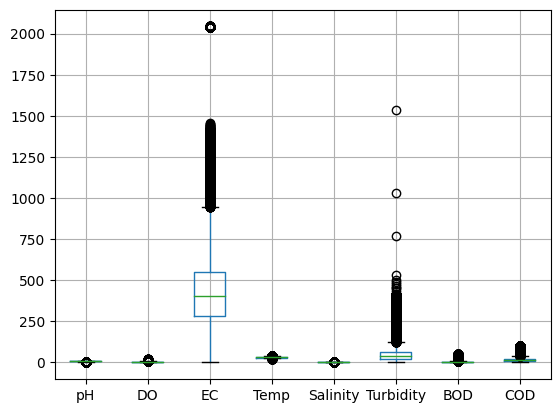

In [192]:
df.boxplot()

จัดการ outlier data


In [193]:


def remove_outlier(df):

    # คำนวณ Q1, Q3, และ IQR สำหรับแต่ละคอลัมน์
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # กำหนดค่า Threshold (สามารถปรับค่าตามความเหมาะสม)
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # ตรวจสอบและจัดการ Outlier ในแต่ละคอลัมน์
    outliers = ((df < lower_threshold) | (df > upper_threshold))
    df_no_outliers = df[~outliers]
    return df_no_outliers

In [194]:
# pH	DO	EC	Temp	Salinity	Turbidity	BOD	COD
df_out = df.copy()
df_out = df_out.iloc[:].apply(lambda x: x.round(2))
df_out = remove_outlier(df_out)

<Axes: >

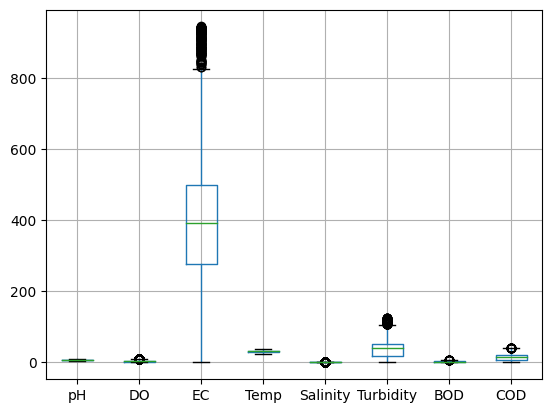

In [195]:
df_out.boxplot()

## duplicate data


In [196]:
print('จำนวน Duplicate Data df:', df.duplicated().sum())

จำนวน Duplicate Data df: 146


In [197]:
# ลบ Duplicate Data
df = df.drop_duplicates()

In [198]:
df_split_copy = df.copy()

## แบ่งชุดข้อมูล


In [199]:
# seed สุ่มข้อมูล
seed = 5712
# แบ่งชุดข้อมูลออกเป็น test
df_split, df_test = train_test_split(
    df_split_copy, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  validation
df_split, df_valid = train_test_split(
    df_split, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  training
df_split, df_train = train_test_split(
    df_split, test_size=0.01, random_state=seed)

In [200]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล validation :', len(df_valid))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 44210
จำนวนชุดข้อมูล training : 442
จำนวนชุดข้อมูล validation : 5
จำนวนชุดข้อมูล test : 5


## Data Transformation: Normalization


In [201]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm


def min4norm(Data):
    _min = Data.min(axis=0, keepdims=True)
    return _min


def max4norm(Data):
    _max = Data.max(axis=0, keepdims=True)
    return _max

# KNN


In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]
X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]
X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

# สร้างโมเดล KNNC
model = KNeighborsClassifier(n_neighbors=3)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train.values.ravel())

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)

# Evaluating Model KNNC

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"KNNC Accuracy: {accuracy}")

KNNC Accuracy: 0.4


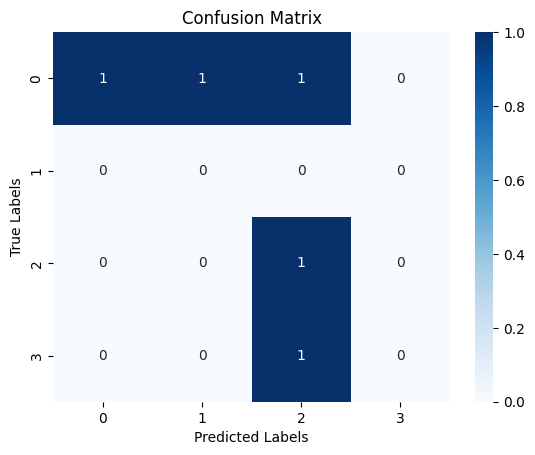

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Naive bayes


In [204]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [205]:
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]
X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]
X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

In [206]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train.values.ravel())

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)

## Evaluating Model Naive bayes


In [207]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.2


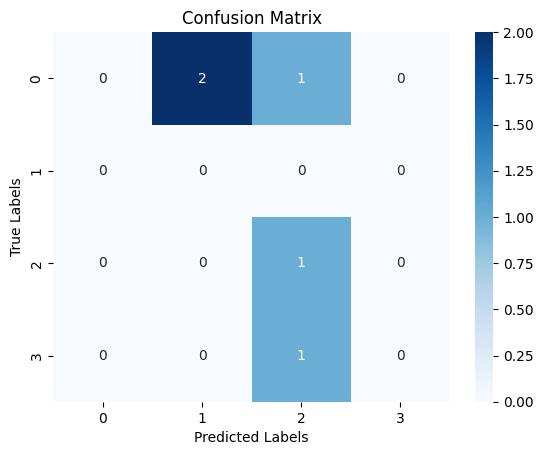

In [208]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree


In [209]:
from sklearn.tree import DecisionTreeClassifier


# แยก features (X) และ target (Y) จาก df_train
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]['pH']

X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]

X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test)

# Evaluating Model Decision Tree


In [210]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.2


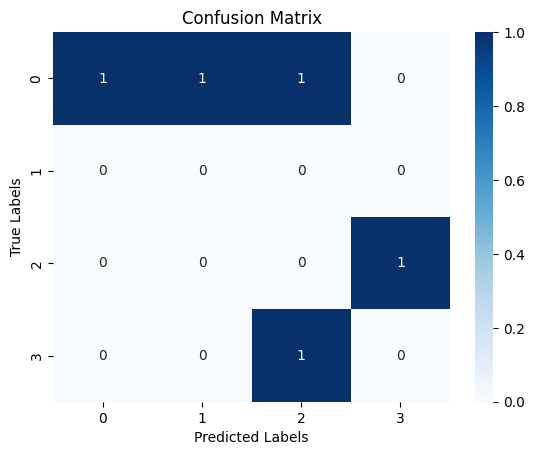

In [211]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()